In [1]:
'''
35100007_visualization 
'''
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("../dataset/35100007.csv")


C:\Users\2679s\AppData\Local\Temp\ipykernel_13492\113768242.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../dataset/35100007.csv")


# step 1 data wrangling

In [3]:
df.head()

,REF_DATE,GEO,DGUID,Sex,Indigenous identity,Correctional services,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1997/1998,Provinces and territories,2016A000011124,"Total, admissions by sex","Total, admissions by Indigenous identity",Total correctional services,Number,223,units,0,v32464911,1.1.1.1,70542.0,NaN,NaN,NaN,0
1,1997/1998,Provinces and territories,2016A000011124,"Total, admissions by sex","Total, admissions by Indigenous identity",Pre-trial detention,Number,223,units,0,v32464912,1.1.1.2,16010.0,NaN,NaN,NaN,0
2,1997/1998,Provinces and territories,2016A000011124,"Total, admissions by sex","Total, admissions by Indigenous identity",Provincial director remand,Number,223,units,0,v32464913,1.1.1.3,NaN,..,NaN,NaN,0
3,1997/1998,Provinces and territories,2016A000011124,"Total, admissions by sex","Total, admissions by Indigenous identity",Secure custody,Number,223,units,0,v32464914,1.1.1.4,8019.0,NaN,NaN,NaN,0
4,1997/1998,Provinces and territories,2016A000011124,"Total, admissions by sex","Total, admissions by Indigenous identity",Custody and supervision (secure),Number,223,units,0,v32464915,1.1.1.5,NaN,..,NaN,t,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29440 entries, 0 to 29439
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   REF_DATE               29440 non-null  object 
 1   GEO                    29440 non-null  object 
 2   DGUID                  28224 non-null  object 
 3   Sex                    29440 non-null  object 
 4   Indigenous identity    29440 non-null  object 
 5   Correctional services  29440 non-null  object 
 6   UOM                    29440 non-null  object 
 7   UOM_ID                 29440 non-null  int64  
 8   SCALAR_FACTOR          29440 non-null  object 
 9   SCALAR_ID              29440 non-null  int64  
 10  VECTOR                 29440 non-null  object 
 11  COORDINATE             29440 non-null  object 
 12  VALUE                  19056 non-null  float64
 13  STATUS                 10384 non-null  object 
 14  SYMBOL                 0 non-null      float64
 15  TE

In [5]:
df.describe()

,UOM_ID,SCALAR_ID,VALUE,SYMBOL,DECIMALS
count,29440.0,29440.0,19056.000000,0.0,29440.0
mean,223.0,0.0,181.777918,NaN,0.0
std,0.0,0.0,881.459175,NaN,0.0
min,223.0,0.0,0.000000,NaN,0.0
25%,223.0,0.0,0.000000,NaN,0.0
50%,223.0,0.0,1.000000,NaN,0.0
75%,223.0,0.0,31.000000,NaN,0.0
max,223.0,0.0,24425.000000,NaN,0.0


In [6]:
# replace missing values with 0
df['VALUE'].replace(np.nan,0.0001,inplace=True)

In [7]:
df['VALUE'].iloc[61:73]

61      0.0001
62      0.0001
63      0.0001
64      0.0001
65      0.0000
66      0.0001
67      0.0001
68      0.0001
69      0.0001
70    276.0000
71     28.0000
72      2.0000
Name: VALUE, dtype: float64

# step2 data visualization


## 1 line chart by sex
sex-females and males in the same line charts<br>
display the trend during ten years from 2012/2013 to 2021/2022 in each GEO<br>

In [8]:
geo_features = df.drop_duplicates(subset=["GEO"],keep='first')["GEO"]
geo_features = geo_features.tolist()
for name in ['Ontario, Ministry of Children and Youth Services (MCYS)','Ontario, Ministry of Community Safety and Correctional Services (MCSCS)']:
    geo_features.remove(name)
geo_features

['Provinces and territories',
 'Newfoundland and Labrador',
 'Prince Edward Island',
 'Nova Scotia',
 'New Brunswick',
 'Quebec',
 'Ontario',
 'Manitoba',
 'Saskatchewan',
 'Alberta',
 'British Columbia',
 'Yukon',
 'Northwest Territories',
 'Nunavut']

In [9]:
date_features = df.drop_duplicates(subset=["REF_DATE"],keep='first')["REF_DATE"]
date_features = date_features.tolist()
date_features

['2012/2013',
 '2013/2014',
 '2014/2015',
 '2015/2016',
 '2016/2017',
 '2017/2018',
 '2018/2019',
 '2019/2020',
 '2020/2021',
 '2021/2022']

In [10]:
def plotAdmissionRelease(geo_features):
    for feature in geo_features:
        df_geo_0 = df[df.GEO==feature]
        df_geo_1 = df_geo_0[df_geo_0['Sex'] =='Total, admissions by sex']
        df_geo_1 = df_geo_1[df_geo_1['Correctional services'] =='Total correctional services']
        df_geo_1 = df_geo_1[df_geo_1['Indigenous identity'] =='Indigenous identity']
        df_geo_1.rename(columns={'Indigenous identity': 'indigenous'}, inplace=True)
        df_geo_1.reset_index(drop=True, inplace=True)

        df_geo_2 = df_geo_0[df_geo_0['Sex'] =='Total, admissions by sex']
        df_geo_2 = df_geo_2[df_geo_2['Correctional services'] =='Total correctional services']
        df_geo_2 = df_geo_2[df_geo_2['Indigenous identity'] =='Non-Indigenous identity']
        df_geo_2.rename(columns={'Indigenous identity': 'non-indigenous'}, inplace=True)
        # df_geo_1.rename(columns={'Sex': 'male'}, inplace=True)
        df_geo_2.reset_index(drop=True, inplace=True)

        df_geo_3 = df_geo_0[df_geo_0['Sex'] =='Total, admissions by sex']
        df_geo_3 = df_geo_3[df_geo_3['Correctional services'] =='Total correctional services']
        df_geo_3 = df_geo_3[df_geo_3['Indigenous identity'] =='Indigenous identity unknown']
        df_geo_3.rename(columns={'Indigenous identity': 'unknow'}, inplace=True)
        # df_geo_1.rename(columns={'Sex': 'male'}, inplace=True)
        df_geo_3.reset_index(drop=True, inplace=True)

        df_year = pd.DataFrame({'REF_DATE':df_geo_1['REF_DATE'],'indigenous':df_geo_1['VALUE'],'non-indigenous':df_geo_2['VALUE'],'unknown':df_geo_3['VALUE']})
        df_year.index = df_year['REF_DATE']
        
        positions = [i for i in range(10)]
        labels = date_features
        ax = df_year.plot(figsize=(12,6),title= feature,x_compat=True)
        ax.set_xticks(positions)
        ax.set_xticklabels(labels)
        # df_year.plot()

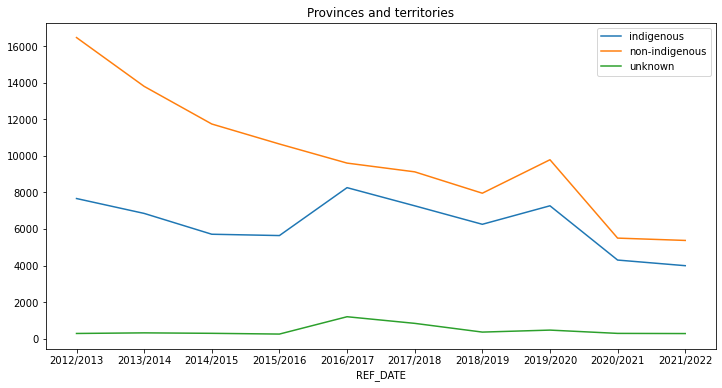

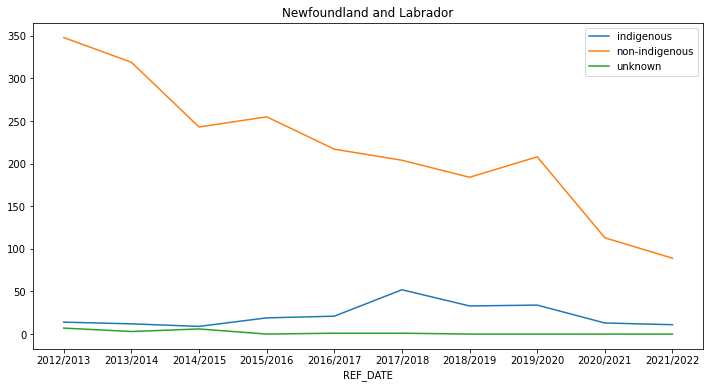

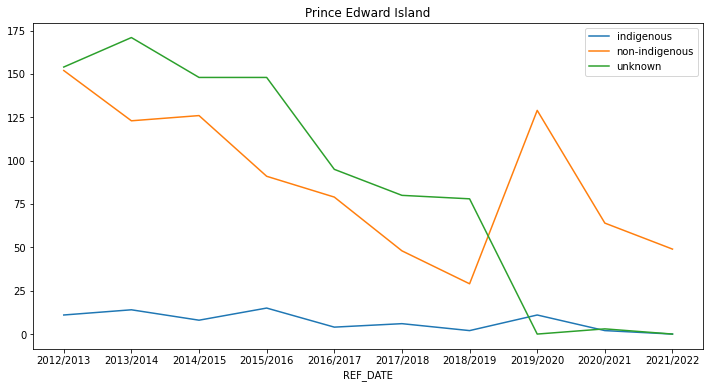

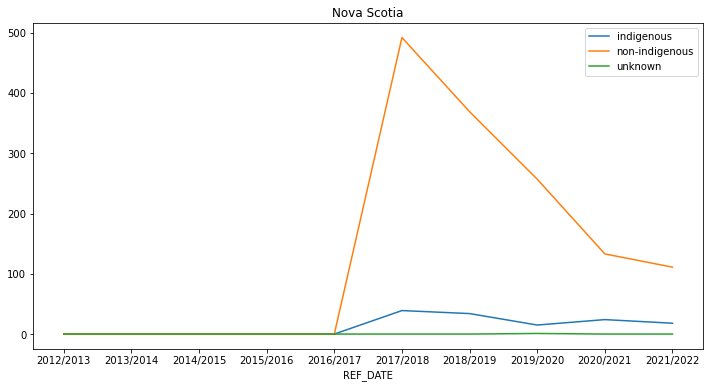

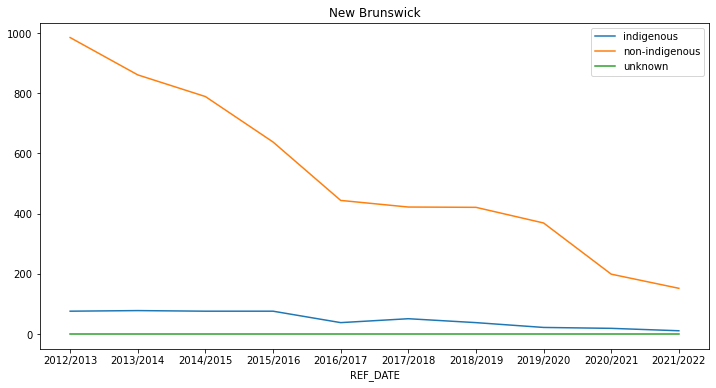

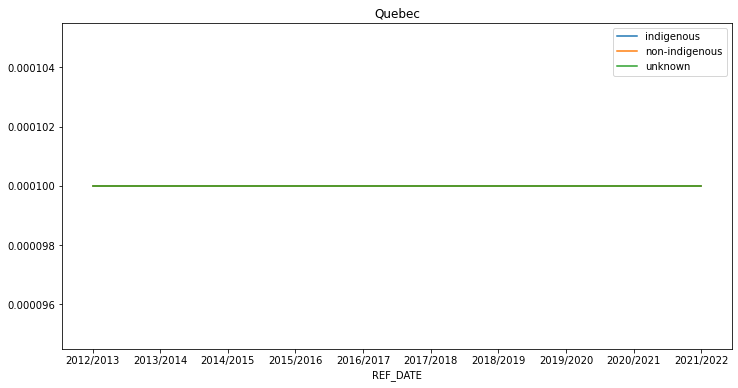

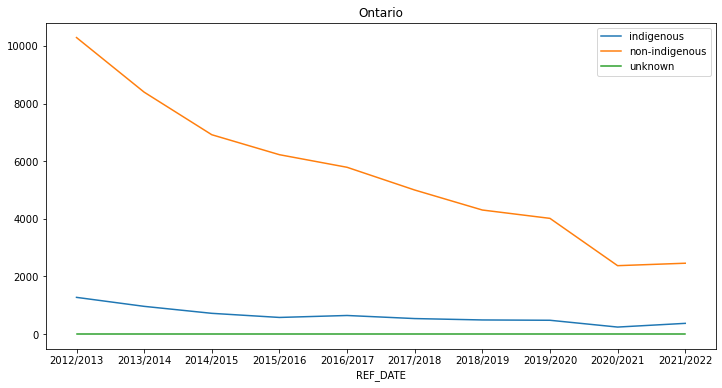

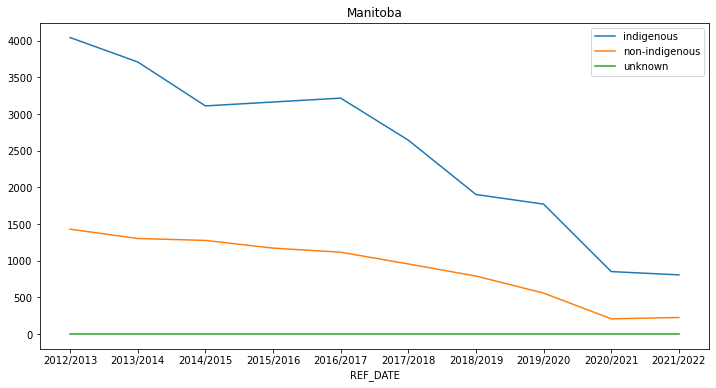

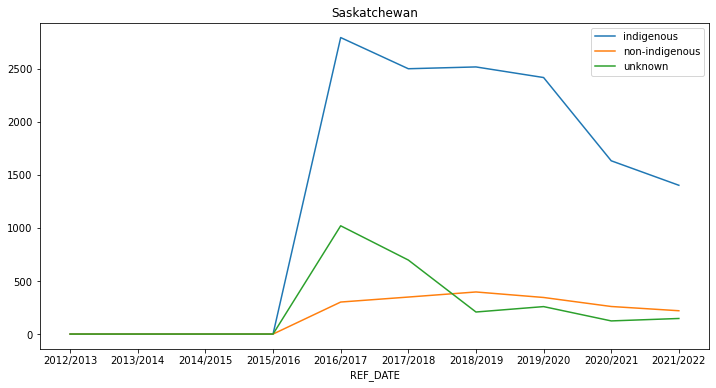

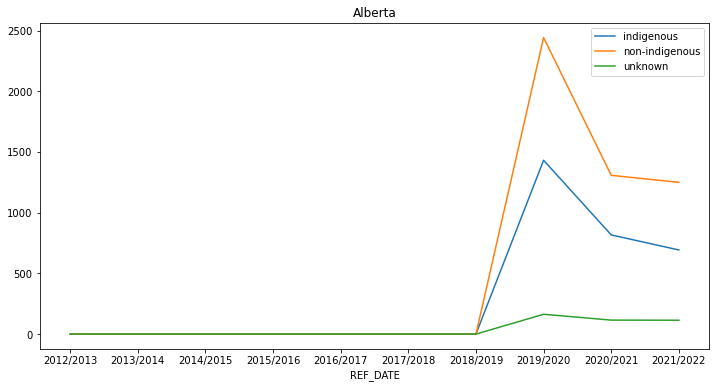

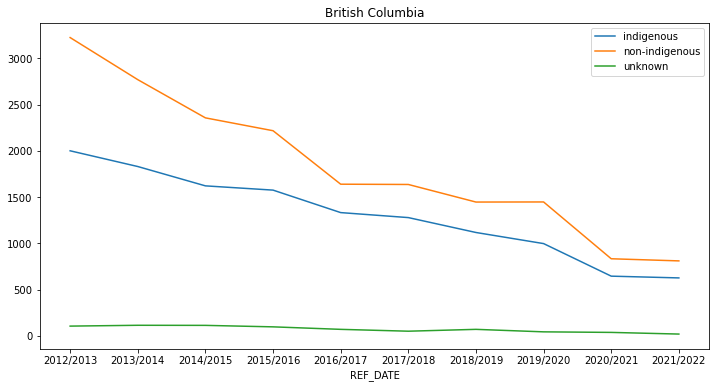

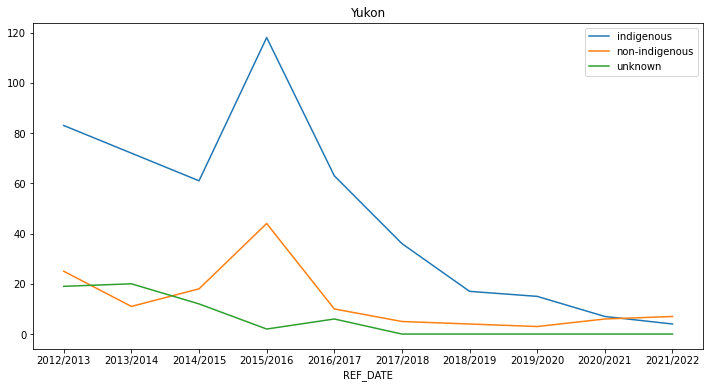

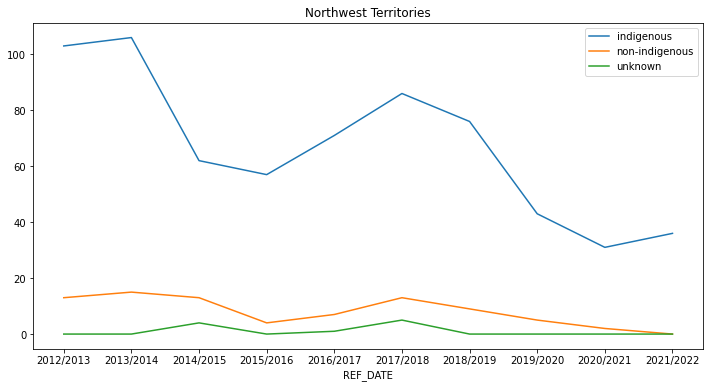

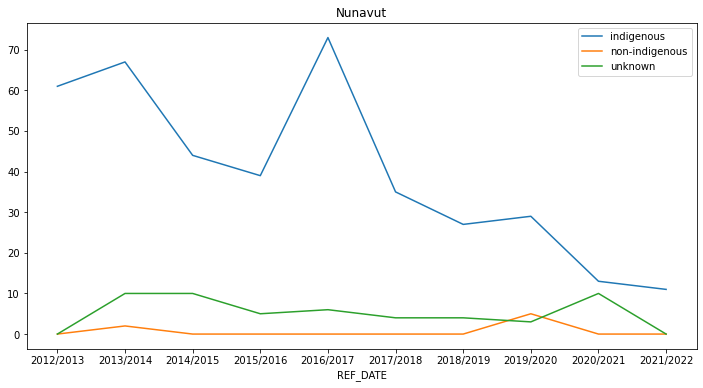

In [11]:
plotAdmissionRelease(geo_features)